In [1]:
%load_ext autoreload
%autoreload 2

# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import sys
import logging
from tqdm import tqdm
from scipy.spatial.distance import euclidean

# Configure logging to show debug messages only from our project code
# Set root logger to WARNING to suppress debug from other libraries
logging.getLogger().setLevel(logging.DEBUG)

# ignore debug messages from other libraries
logging.getLogger('matplotlib').setLevel(logging.WARNING)

# deterministic random seed for reproducibility
import random
random.seed(42)
np.random.seed(42) 


# import the project root
sys.path.insert(0, '../..')
from src.covertree import CoverTree 
from src.dyadictree import DyadicTree
from src.dyadictreenode import DyadicTreeNode
from src.utils import *

from load_mnist import load_dataset

X shape: (1000, 784)
1000


In [2]:
logging.getLogger().setLevel(logging.WARNING)

# ========== NEW: Scikit-learn-like API Demo ==========

# Load fresh MNIST data for the demo
X_demo, original_shape_demo = load_dataset(flatten=True, num_points=-1)

# Create a new CoverTree for clean demo
cover_tree_demo = CoverTree(X_demo, euclidean, leafsize=10)

# Create DyadicTree using NEW API (without fitting yet)
dyadic_sklearn = DyadicTree(
    cover_tree=cover_tree_demo,
    manifold_dims=0,      # Expected intrinsic dimension
    max_dim=X_demo.shape[-1],  # Maximum basis dimension  
    thresholds=0.0,       # Thresholds for basis construction
    precisions=1e-2,      # Precision parameters
    inverse=True          # Data in (n,d) format
)

KeyboardInterrupt: 

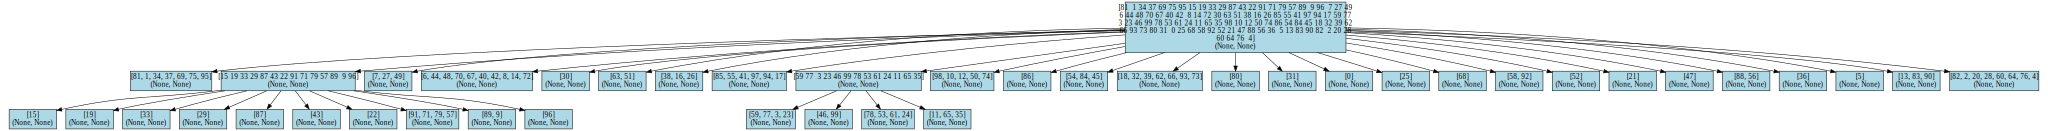

In [17]:
_ = dyadic_sklearn.plot_tree_graphviz()

In [24]:
# Prune nodes above level 3 (keep only 4 levels: 0, 1, 2, 3)
max_level = 1
print(f"\nPruning nodes above level {max_level}...")
dyadic_sklearn.prune_max_level(max_level)


Pruning nodes above level 1...


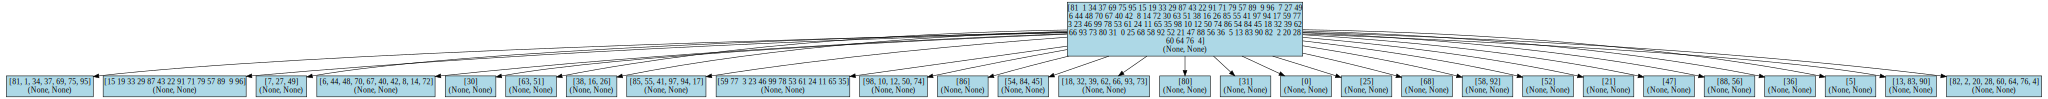

In [25]:
_ = dyadic_sklearn.plot_tree_graphviz()

In [8]:
dyadic_sklearn.fit(X_demo)

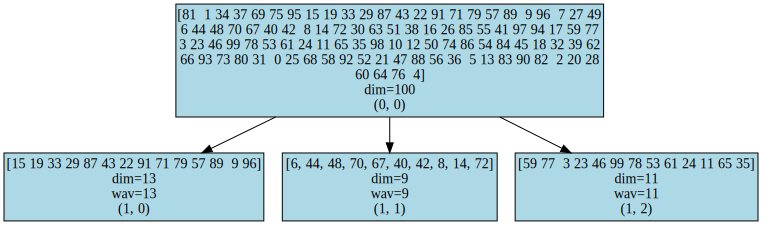

In [9]:
# plot the tree after fit basis
_ = dyadic_sklearn.plot_tree_graphviz(show_basis_dim=True)

In [12]:
# fgwt batch
X_demo_fgwt = dyadic_sklearn.fgwt_batch(X_demo)

DEBUG:root:Retrieving all leaf nodes from the DyadicTree
DEBUG:root:Found 3 leaf nodes
DEBUG:root:Found 3 leaf nodes for batch processing
DEBUG:root:['(j=1, k=0)', '(j=1, k=1)', '(j=1, k=2)']
DEBUG:root:Processed leaf (j=1, k=0)
DEBUG:root:Processed leaf (j=1, k=1)
DEBUG:root:Processed leaf (j=1, k=2)


In [14]:
X_demo_fgwt.shape

(100, 333)